In [1]:
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns



In [2]:
df = pd.read_csv("../data/01_raw/synthetic_dataset.csv")

print(df.head())

   transaction_id     transaction_time  transaction_amount  sender_id  \
0               0  2025-11-03 10:00:00             1784.21  acc599093   
1               1  2025-11-07 21:27:36             1766.56  acc729547   
2               2  2025-10-06 07:05:36              417.21  acc838332   
3               3  2025-10-28 18:17:33             2005.70  acc465352   
4               4  2025-11-09 19:55:34             1929.09  acc265571   

                 name             cpf receiver_id       receiver_name  \
0        Leo Ferreira  972.085.164-30   acc194554       Alice Machado   
1  Maria Helena Costa  268.947.503-00   acc933654    Vitoria Carvalho   
2     Gabriela Fogaca  423.176.095-07   acc131570      Daniela Castro   
3      Eduardo Campos  314.782.950-23   acc293419     Matheus da Mota   
4         Jade da Paz  967.258.041-01   acc812123  Jose Pedro Andrade   

  transaction_type     transaction_city  ... device_id device_model  \
0              ted     Sampaio Paulista  ...      d

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119887 entries, 0 to 119886
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      119887 non-null  int64  
 1   transaction_time    119887 non-null  object 
 2   transaction_amount  119887 non-null  float64
 3   sender_id           119887 non-null  object 
 4   name                119887 non-null  object 
 5   cpf                 119887 non-null  object 
 6   receiver_id         119887 non-null  object 
 7   receiver_name       119887 non-null  object 
 8   transaction_type    119887 non-null  object 
 9   transaction_city    119887 non-null  object 
 10  birth_date          119887 non-null  object 
 11  address_pcode       119887 non-null  object 
 12  phone_number        119887 non-null  object 
 13  acc_creation_date   119887 non-null  object 
 14  agency              119887 non-null  int64  
 15  account             119887 non-nul

In [4]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

df['birth_date'] = pd.to_datetime(df['birth_date'])

df['acc_creation_date'] = pd.to_datetime(df['acc_creation_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119887 entries, 0 to 119886
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      119887 non-null  int64         
 1   transaction_time    119887 non-null  datetime64[ns]
 2   transaction_amount  119887 non-null  float64       
 3   sender_id           119887 non-null  object        
 4   name                119887 non-null  object        
 5   cpf                 119887 non-null  object        
 6   receiver_id         119887 non-null  object        
 7   receiver_name       119887 non-null  object        
 8   transaction_type    119887 non-null  object        
 9   transaction_city    119887 non-null  object        
 10  birth_date          119887 non-null  datetime64[ns]
 11  address_pcode       119887 non-null  object        
 12  phone_number        119887 non-null  object        
 13  acc_creation_date   119887 no

In [5]:
df['sender_age'] = ((df['transaction_time'] - df['birth_date']).dt.days/365).astype(int)

df['transaction_hour'] = df['transaction_time'].dt.hour

df['large_amt'] = df['transaction_amount'] > 10000

df['acc_age_days'] = (df['transaction_time'] - df['acc_creation_date']).dt.days

print(df.head())

   transaction_id    transaction_time  transaction_amount  sender_id  \
0               0 2025-11-03 10:00:00             1784.21  acc599093   
1               1 2025-11-07 21:27:36             1766.56  acc729547   
2               2 2025-10-06 07:05:36              417.21  acc838332   
3               3 2025-10-28 18:17:33             2005.70  acc465352   
4               4 2025-11-09 19:55:34             1929.09  acc265571   

                 name             cpf receiver_id       receiver_name  \
0        Leo Ferreira  972.085.164-30   acc194554       Alice Machado   
1  Maria Helena Costa  268.947.503-00   acc933654    Vitoria Carvalho   
2     Gabriela Fogaca  423.176.095-07   acc131570      Daniela Castro   
3      Eduardo Campos  314.782.950-23   acc293419     Matheus da Mota   
4         Jade da Paz  967.258.041-01   acc812123  Jose Pedro Andrade   

  transaction_type     transaction_city  ... receiver_account gender  \
0              ted     Sampaio Paulista  ...           7

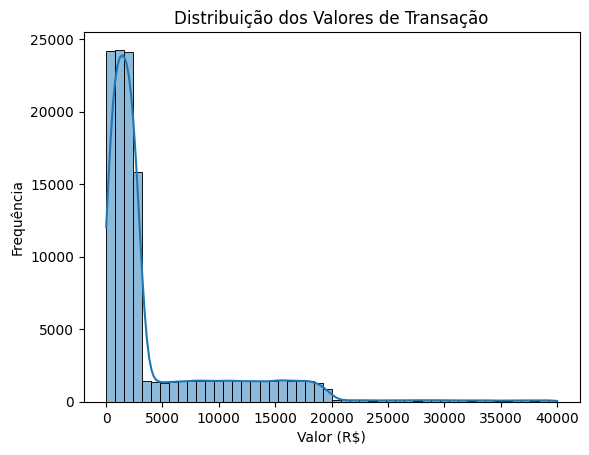

In [6]:
sns.histplot(df['transaction_amount'], bins=50, kde=True)
plt.title('Distribuição dos Valores de Transação')
plt.xlabel('Valor (R$)')
plt.ylabel('Frequência')
plt.show()

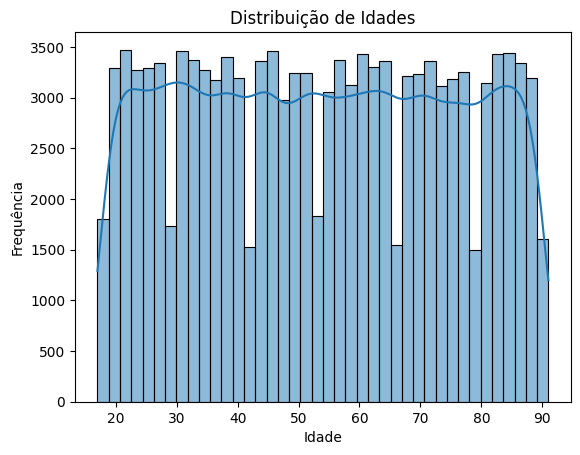

In [7]:
sns.histplot(df['sender_age'], bins=40, kde=True)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')
plt.show()

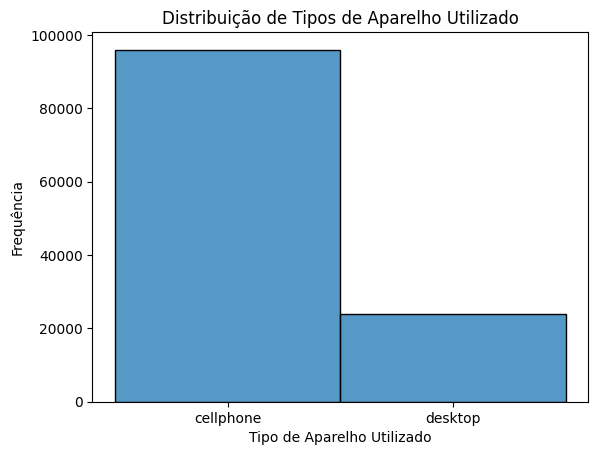

In [8]:
sns.histplot(df['device'], bins=3)
plt.xlabel('Tipo de Aparelho Utilizado')
plt.ylabel('Frequência')
plt.title('Distribuição de Tipos de Aparelho Utilizado')
plt.show()

Análise de grafos

In [9]:
G = nx.from_pandas_edgelist(
    df,
    source='sender_id',    # Origem da seta
    target='receiver_id',   # Ponta da seta
    edge_attr=['transaction_amount', 'acc_age_days'],    # Dados para 'pendurar' na aresta
    create_using=nx.MultiDiGraph()       # Permite multiplas arestas entre os nós
)

In [10]:
total_received = df.groupby('receiver_id')['transaction_amount'].sum()
total_sent = df.groupby('sender_id')['transaction_amount'].sum()

In [11]:
in_degree = dict(G.in_degree())
sus_id = [node for node, degree in in_degree.items() if degree > 10]
print(f"{len(sus_id)} contas recebem de muita gente")

544 contas recebem de muita gente


In [12]:
for conta_id in sus_id:
    in_degree = G.in_degree(conta_id)

    out_degree = G.out_degree(conta_id)

    if in_degree >=10 and out_degree > 0 and out_degree <= 3:
        print(f"Conta {conta_id} recebe de {in_degree} contas e envia para apenas {out_degree} contas")

Conta acc297175 recebe de 11 contas e envia para apenas 3 contas
Conta acc554313 recebe de 12 contas e envia para apenas 3 contas
Conta acc114603 recebe de 11 contas e envia para apenas 1 contas
Conta acc898323 recebe de 11 contas e envia para apenas 3 contas
Conta acc621985 recebe de 12 contas e envia para apenas 2 contas
Conta acc214233 recebe de 12 contas e envia para apenas 1 contas
Conta acc720846 recebe de 16 contas e envia para apenas 2 contas
Conta acc648436 recebe de 11 contas e envia para apenas 3 contas
Conta acc504289 recebe de 11 contas e envia para apenas 2 contas
Conta acc523236 recebe de 11 contas e envia para apenas 3 contas
Conta acc661697 recebe de 11 contas e envia para apenas 3 contas
Conta acc828403 recebe de 11 contas e envia para apenas 2 contas
Conta acc040994 recebe de 18 contas e envia para apenas 2 contas
Conta acc729958 recebe de 13 contas e envia para apenas 1 contas
Conta acc686652 recebe de 12 contas e envia para apenas 2 contas
Conta acc569443 recebe de

In [13]:
metrics_list = []

for sus in sus_id:
    amt_in = total_received.get(sus, 0)
    amt_out = total_sent.get(sus, 0)

    if amt_in > 0:
        ratio = amt_out / amt_in

    else:
        ratio = 0

    if 0.8 <= ratio <= 1.05:
        metrics_list.append({
            'account_id': sus,
            'total_in': amt_in,
            'total_out': amt_out,
            'ratio': ratio,
            'type': 'Suspeita de Laranja'
        })
    elif ratio > 1.05:
        pass

suspects_df = pd.DataFrame(metrics_list)

if not suspects_df.empty:
    print(suspects_df.sort_values('ratio', ascending=False).head(10))

  account_id  total_in  total_out     ratio                 type
2  acc481494  21520.46   21166.35  0.983545  Suspeita de Laranja
4  acc797002  33416.31   32712.09  0.978926  Suspeita de Laranja
3  acc609503  48812.71   47684.92  0.976896  Suspeita de Laranja
6  acc237905  41023.35   39112.68  0.953425  Suspeita de Laranja
7  acc425962  57724.97   52919.87  0.916759  Suspeita de Laranja
1  acc934076  21922.56   20063.69  0.915207  Suspeita de Laranja
0  acc174549  36867.90   32527.78  0.882279  Suspeita de Laranja
5  acc281340  74793.82   60290.61  0.806091  Suspeita de Laranja


In [14]:
# Agrupando por conta para saber a 'velocidade' média do dinheiro
avg_in_time = df.groupby('receiver_id')['transaction_time'].mean()
avg_out_time = df.groupby('sender_id')['transaction_time'].mean()

# DataFrame auxiliar
time_features = pd.DataFrame(index=df['sender_id'].unique())
time_features.index.name = 'account_id'

# Calculando a diferença em HORAS
# avg_retention_hours negativo = enviou antes de receber (dinheiro parado/antigo)
# avg_retention_hours positivo e pequeno = o dinheiro 'queima' na mão.
time_features['avg_retention_hours'] = (avg_out_time - avg_in_time).dt.total_seconds() / 3600

# Preencher NaN quem só recebeu ou só enviou com um valor alto
time_features['avg_retention_hours'] = time_features['avg_retention_hours'].fillna(9999)

print(time_features.head())

            avg_retention_hours
account_id                     
acc599093            138.147569
acc729547            168.574259
acc838332             89.337556
acc465352             27.813287
acc265571             59.677667


In [15]:
# Criar DataFrame base com todos os nós

# Métricas de Grafos
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Métricas Financeiras
total_in = df.groupby('receiver_id')['transaction_amount'].sum()
total_out = df.groupby('sender_id')['transaction_amount'].sum()

# Montar o DataFrame Mestre com todos os nós
all_nodes = list(G.nodes())
metrics_df = pd.DataFrame(index=all_nodes)
metrics_df.index.name = 'account_id'

metrics_df['in_degree'] = metrics_df.index.map(in_degree).fillna(0)
metrics_df['out_degree'] = metrics_df.index.map(out_degree).fillna(0)
metrics_df['total_in'] = total_in
metrics_df['total_out'] = total_out

metrics_df = metrics_df.join(time_features['avg_retention_hours'])

# Calcular Ratio
metrics_df['ratio'] = metrics_df['total_out'] / (metrics_df['total_in'] + 0.01)

# Preencher vazios
metrics_df = metrics_df.fillna(0)

print(f"Dataset pronto para ML com {len(metrics_df)} contas.")

Dataset pronto para ML com 29900 contas.


In [16]:
# Definindo suspeitos
metrics_df['is_suspect'] = 0

suspect = (
    (metrics_df['in_degree'] > 5) &                   # Recebe de vários
    (metrics_df['ratio'].between(0.8, 1.05)) &        # Repassa quase tudo
    (metrics_df['avg_retention_hours'] < 12) &        # Repassa muito rápido (12h)
    (metrics_df['total_in'] > 10000)                  # Valores altos
)

metrics_df.loc[suspect, 'is_suspect'] = 1

print(metrics_df['is_suspect'].value_counts())

is_suspect
0    29752
1      148
Name: count, dtype: int64


In [17]:
print(metrics_df.head())

            in_degree  out_degree  total_in  total_out  avg_retention_hours  \
account_id                                                                    
acc599093           8           4  44956.33   33279.32           138.147569   
acc194554           6           5  10606.53   25456.37            22.116546   
acc729547           3           5   3789.99   33196.35           168.574259   
acc933654           9           6  65752.06    6654.72          -313.236806   
acc838332           5           2   9436.99    1159.69            89.337556   

               ratio  is_suspect  
account_id                        
acc599093   0.740259           0  
acc194554   2.400064           0  
acc729547   8.758931           0  
acc933654   0.101209           0  
acc838332   0.122888           0  


In [18]:
# Converte para um arquivo compacto que será usado na modelagem

metrics_df.to_parquet('../data/01_raw/metrics_df.parquet')